Step 1: Data Preprocessing
-------------------------
Missing values in the dataset:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Data

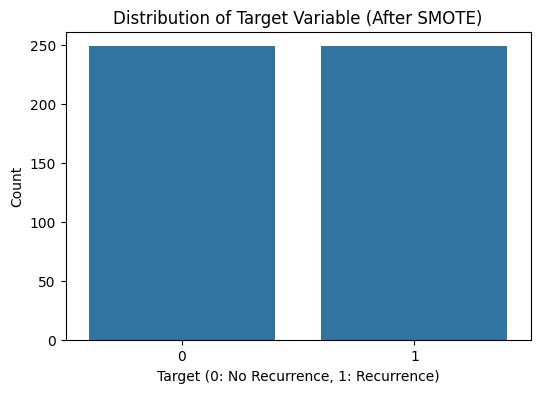

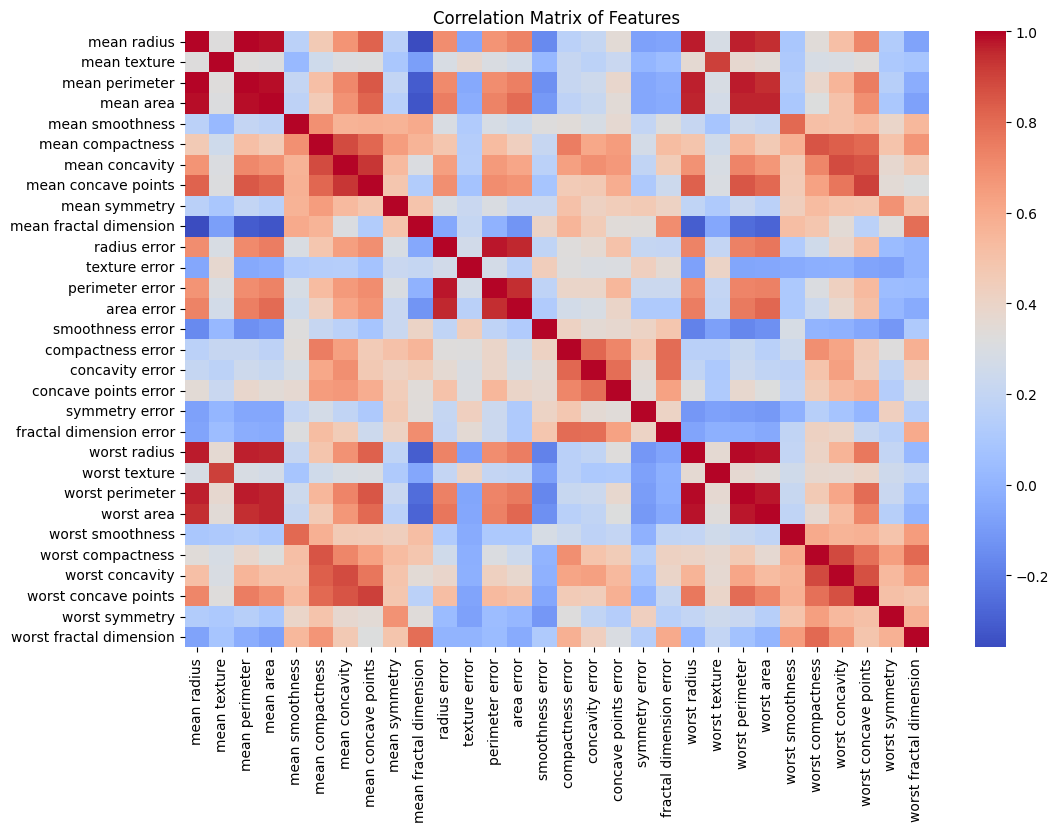

EDA completed.

Step 3: Feature Selection using PCA
-----------------------------------
Explained variance ratio by PCA components: [0.45558963 0.20358529 0.09397185 0.05816972 0.04475568 0.03858183
 0.02372044 0.0150227  0.01228829 0.01034426]
Total explained variance: 0.96
Feature selection completed.

Step 4: Model Training and Evaluation
-------------------------------------
Evaluating Decision Tree...


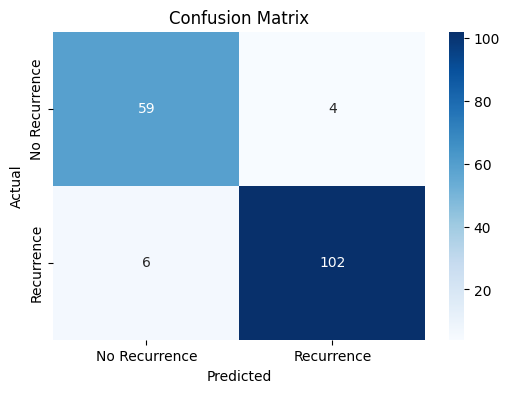

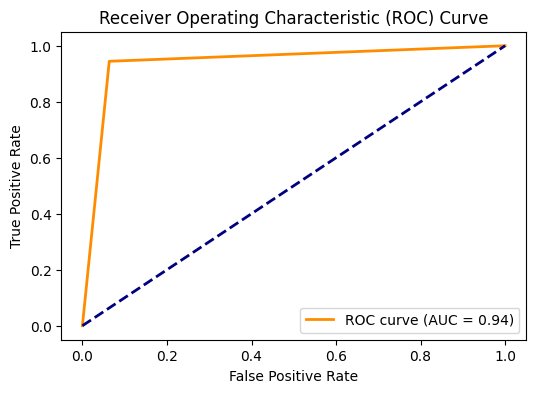

Evaluating Support Vector Machine...


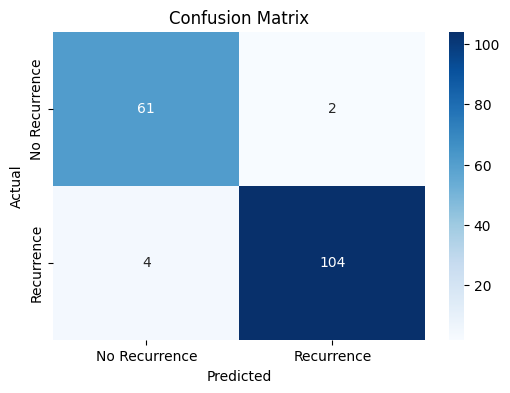

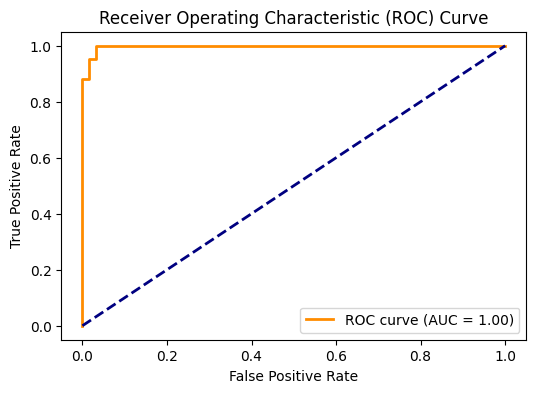

Evaluating K-Nearest Neighbors...


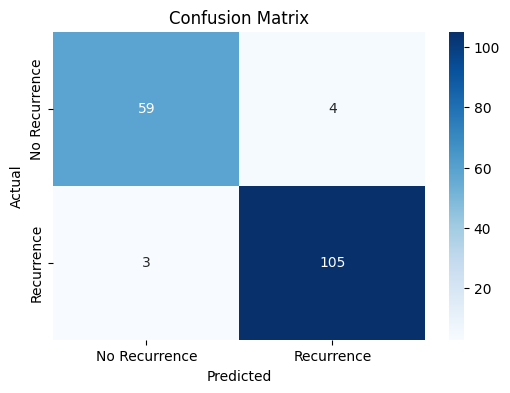

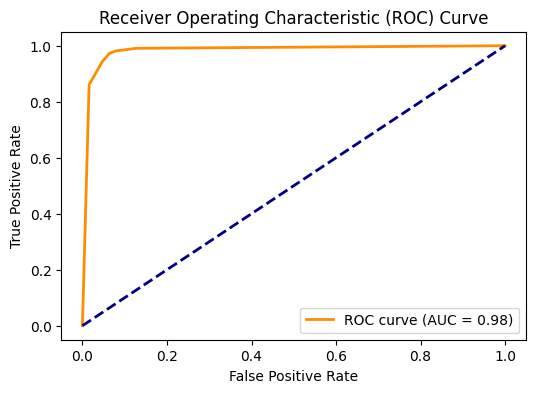

Evaluating Neural Network...


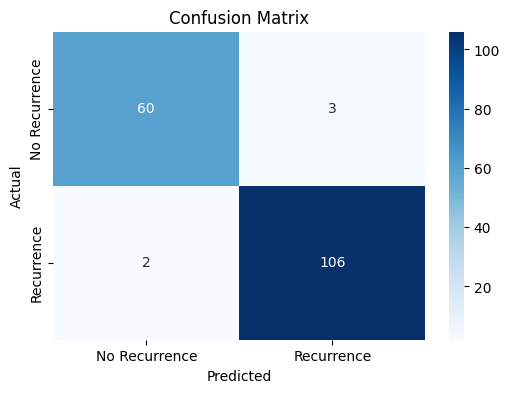

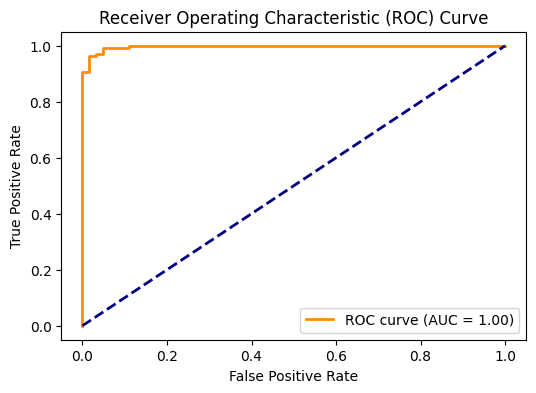


Model Evaluation Results:
                        Accuracy  Precision    Recall  F1-Score   ROC-AUC
Decision Tree           0.941520   0.962264  0.944444  0.953271  0.940476
Support Vector Machine  0.964912   0.981132  0.962963  0.971963  0.997354
K-Nearest Neighbors     0.959064   0.963303  0.972222  0.967742  0.982143
Neural Network          0.970760   0.972477  0.981481  0.976959  0.996914

Step 5: Conclusion
------------------
The best-performing model is:
Accuracy             Neural Network
Precision    Support Vector Machine
Recall               Neural Network
F1-Score             Neural Network
ROC-AUC      Support Vector Machine
dtype: object


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 1. Data Preprocessing
print("Step 1: Data Preprocessing")
print("-------------------------")

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Data preprocessing completed.\n")

# 2. Exploratory Data Analysis (EDA)
print("Step 2: Exploratory Data Analysis (EDA)")
print("--------------------------------------")

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_res)
plt.title("Distribution of Target Variable (After SMOTE)")
plt.xlabel("Target (0: No Recurrence, 1: Recurrence)")
plt.ylabel("Count")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_train_res, columns=data.feature_names).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Features")
plt.show()

print("EDA completed.\n")

# 3. Feature Selection using PCA
print("Step 3: Feature Selection using PCA")
print("-----------------------------------")

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Retain top 10 principal components
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)

print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2f}")
print("Feature selection completed.\n")

# 4. Model Training and Evaluation
print("Step 4: Model Training and Evaluation")
print("-------------------------------------")

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    return accuracy, precision, recall, f1, roc_auc

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)
}

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train_pca, X_test_pca, y_train_res, y_test)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Display results
print("\nModel Evaluation Results:")
results_df = pd.DataFrame(results).T
print(results_df)

# 5. Conclusion
print("\nStep 5: Conclusion")
print("------------------")
print("The best-performing model is:")
print(results_df.idxmax())